# EDA (Exploratory Data Analysis)

EDA is the process of analyzing data sets to summarize their characteristics using a combination of statistical calculations and data visualizations.

Understand the relationships among the data, including the shape and spread of the data, and the validity to use it for a variety of different predictive algorithms when we want to develop a machine learning pipeline.

# Univariate Statistics 

**univariate** means "one variable" and it ignores any sort of relationhip with other variables. 


There are three types of univariate statistics that we are interested in for each variable

* General Information  (data type, count of total values, number of unique variables)

* Range and middle (min, max, mean, median, mode, quartiles)

* Normality and spread (standard deviation, skewness, kurtosis)



## 01. Normality 


One of the primary purposes of univariate analysis is to measure the degree of "normality" in each feature's distribution. 

Many of the analysis depend on that our distribution data is a *normal distribution* (Gaussian), so in the univariate analysis we need to find out how normal our data is. 




### 01.01. Importance

Normal distribution have some unique properties that can be valuable in data analytics

* Probablity Theory
* Central Limit Theorem 

Some properties we can find:


1.   Symmetric about its mean
2.   It has a few or no outliers
3.   It's one of the few types of propability distributions that are stable and that can be expressed by **analytical functions**. *(critical need for predictive data analytics)*

The closer a variable's distribution represents a normal distribution, the more reliably it can be used in predictive data analytics 

### 01.02. Histogram

Chart that hep us to check the normality from a variable. For a normally-distributed variable most of the cases will have values close to the "middle" range ( marked by the mean $\mu$). Also the number of cases for each value decreses (moving away from the mean) at an increasing rate first; then inflecting to a decreasing rate.

## 02. Example

In [1]:
# https://www.kaggle.com/mirichoi0218/insurance
import pandas as pd 
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We want to know how much the factors explain or relate to "charges"

### 02.01. Stat General Info

Stats Info for our numerical values 

In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
df.shape

(1338, 7)

All variables stats (numeric + categorical)

In [4]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
df.count() #clean dataset 

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

### 02.02. Unique values 

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:

for feature in df.columns.values:
  print(f'{feature}: {df[feature].nunique()}')

age: 47
sex: 2
bmi: 548
children: 6
smoker: 2
region: 4
charges: 1337


### 02.03. Missing Values

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
for feature in df.columns.values:
  print(f'{feature}: {df[feature].isnull().sum()}')

age: 0
sex: 0
bmi: 0
children: 0
smoker: 0
region: 0
charges: 0


### 02.04. Data Types

In [10]:
for feature in df.columns.values:
  print(f'{feature}: {df[feature].dtype}')

age: int64
sex: object
bmi: float64
children: int64
smoker: object
region: object
charges: float64


In [11]:
for feature in df.columns.values:
  print(f'{feature}: {pd.api.types.is_numeric_dtype(df[feature])}')

age: True
sex: False
bmi: True
children: True
smoker: False
region: False
charges: True


## 03. Boundaries and Middles

### 03.01. Boundaries

The boundaries are simple the min/max values of a variable 

### 03.02. Quartiles
Quartiles represent "inner" boundaries among "quarters" of the dataset.

### 03.03. Example


In [12]:
import pandas as pd 
print(df.charges.count())
print(df.charges.min())
print(df.charges.max())
print(df.charges.quantile(0.25))
print(df.charges.quantile(0.50))
print(df.charges.mean())
print(df.charges.median())
print(df.charges.mode().values)

1338
1121.8739
63770.42801
4740.28715
9382.033
13270.422265141257
9382.033
[1639.5631]


## 04. Spread: Standard Deviation

A standard deviation $σ$ tell us how spread out the data is from the mean

It is not a measure of normality. It marks the ranges at which the dataset would represent a normal distribution, but that does not mean that data is normally distributed.

* $σ = 1$ (68.2 %)
* $σ = 2$ (95.4 %)
* $σ = 3$ (99.8 %)




---



Formule adjusted for samples of a population:


$\sigma = \sqrt{ \frac{1}{N-1} \sum_{i = 1}^N (x_i - \bar{x})^2}$

### 04.01. Example

In [13]:
df.charges.std() #sample formula by default

12110.011236693994

In [14]:
import numpy as np
np.std(df.charges) #numpy by default assumes it is a population

12105.484975561605

In [15]:
np.std(df.charges,ddof=1)#sample formula

12110.011236693994

## 05. (Ab)Normality: Skew, Kurt

* **Skewness** measures how much the bulk of the histogram data is skewed to the right or left of the x-axis

     * Rule of thumb [-1,1] is ok
     * There are math transformation to fix it 

* **kurtosis** measures how high or low the peak of the data is

Extreme amount of either of these two statistics could results in problems down the road in the modeling phase.

### 05.01. Example


Bias correction in skew and kurt refers to the likelihood of bias when based on a sample versus the entire population.



When we are working with samples and not the whole population, **a bias correction** needs to be made. By default **scipy** assumes population.




In [16]:
from scipy.stats import kurtosis,skew
print(skew(df.charges,bias = False)) #to assume sample
print(kurtosis(df.charges,bias = False))

1.5158796580240383
1.6062986532967916


In [17]:
print(df.charges.skew()) #sample by default 
print(df.charges.kurt())

1.5158796580240388
1.6062986532967907


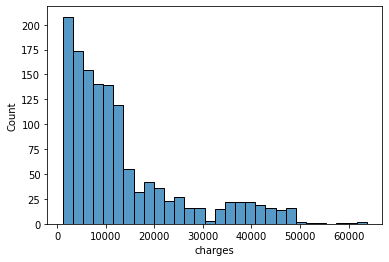

In [18]:
import seaborn as sns
sns.histplot(df.charges);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


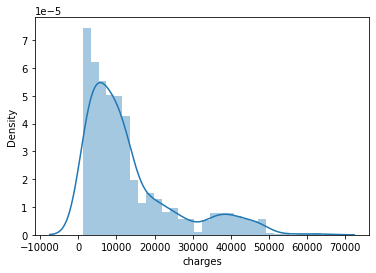

In [19]:
sns.distplot(df.charges);